In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
gold = pd.read_csv('ouro2.csv')
gold['Data']= pd.to_datetime(gold['Data']) #transform data into datetime
#Variação do preço do ouro
gold['Delta_valor'] = gold.Valor - gold.Valor.shift(-1)

<AxesSubplot:xlabel='Data', ylabel='Delta_valor'>

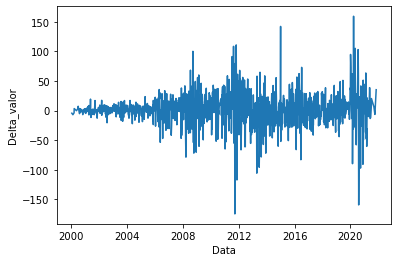

In [4]:
#print timeline graph
sns.lineplot(x=gold.Data,y=gold.Delta_valor)

# Estacionariedade da série

In [8]:
# ADF Test
result = adfuller(gold.Delta_valor[:-1], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(gold.Delta_valor[:-1], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -34.63241508035891
p-value: 0.0
Critial Values:
   1%, -3.436341508283391
Critial Values:
   5%, -2.864185524365606
Critial Values:
   10%, -2.5681785627437677

KPSS Statistic: 0.082474
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/home/yan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/yan/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## Autocorrelação e Autocorrelação Parcial

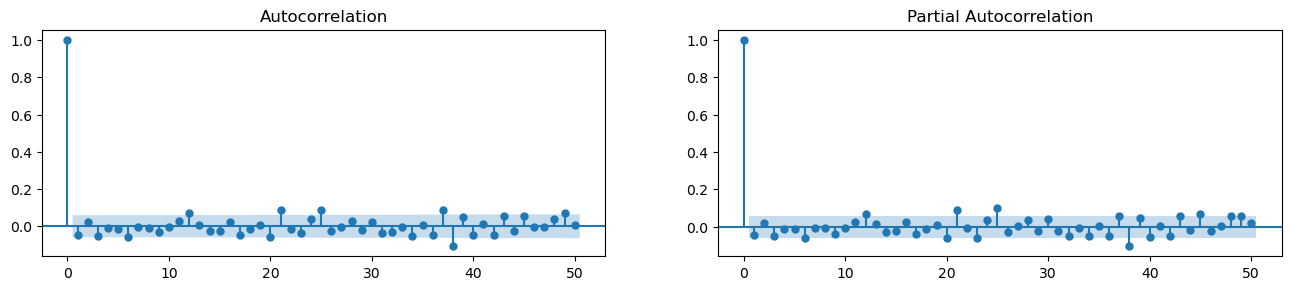

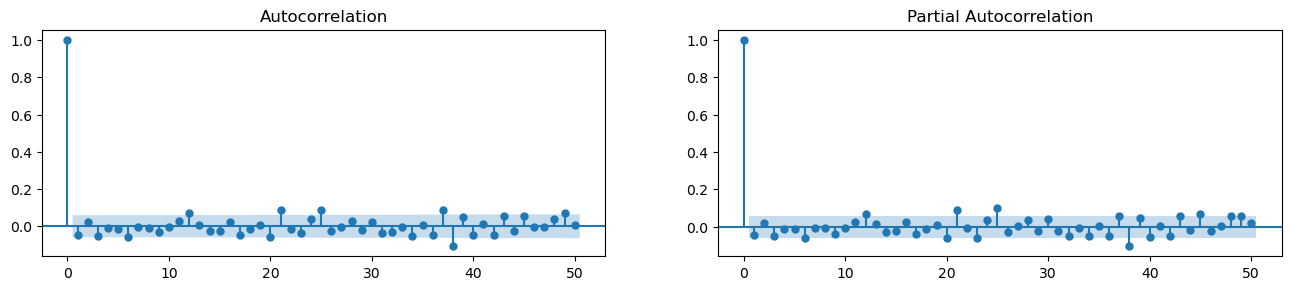

In [11]:
# Calculate ACF and PACF upto 50 lags
acf_50 = acf(gold.Delta_valor[:-1], nlags=50)
pacf_50 = pacf(gold.Delta_valor[:-1], nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(gold.Delta_valor[:-1].tolist(), lags=50, ax=axes[0])
plot_pacf(gold.Delta_valor[:-1].tolist(), lags=50, ax=axes[1])

## Conjunto de treinamento

In [27]:
y_test = gold[:100] #Consideramos como treinamento os 100 ultimos dias
y_train = gold[100:]

# Métodos tradicionais

### Modelo autoregressivo

In [28]:
y_test

,Data,Valor
0,2021-06-13,1868.0
1,2021-06-06,1879.6
2,2021-05-30,1892.0
3,2021-05-23,1905.3
4,2021-05-16,1878.9
...,...,...
95,2019-08-18,1563.5
96,2019-11-08,1549.2
97,2019-04-08,1534.5
98,2019-07-28,1485.3


In [29]:
y_train

,Data,Valor
100,2019-07-14,1465.5
101,2019-07-07,1450.9
102,2019-06-30,1436.6
103,2019-06-23,1446.8
104,2019-06-16,1432.7
...,...,...
1091,2000-07-16,280.1
1092,2000-09-07,281.1
1093,2000-02-07,283.2
1094,2000-06-25,290.1
